## Script is designed to understand the impact of the number of reads on the quality of the assembly

Input files are the stats data were taken from MEGAHIT v1.2.9 log files after assemblies were done <br>
Output is the plots and a table

Stats data format example: <br>
2022-06-17 15:13:01 - 159340 contigs, total 290670260 bp, min 200 bp, max 784853 bp, avg 1824 bp, N50 9544 bp

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

In [7]:
cs = pd.read_csv('input/Assembly_stats.csv', header=None)
cs.columns = ['path','total_bp','minCL_bp','maxCL_bp','avgCL_bp','N50']
cs['contigs'] = cs['path'].str.split(' - ',expand=True)[1]
cs['nameS'] = cs['path'].str.split('/',expand=True)[0]

cs['nameS'] = cs['nameS'].str.replace(r'assembly_', '')
cs['contigs'] = cs['contigs'].str.replace(r' contigs', '').astype(int)
cs['total_bp'] = cs['total_bp'].str.replace(r'total ', '').str.replace(r' bp', '').astype(int)
cs['minCL_bp'] = cs['minCL_bp'].str.replace(r'min ', '').str.replace(r' bp', '').astype(int)
cs['maxCL_bp'] = cs['maxCL_bp'].str.replace(r'max ', '').str.replace(r' bp', '').astype(int)
cs['avgCL_bp'] = cs['avgCL_bp'].str.replace(r'avg ', '').str.replace(r' bp', '').astype(int)
cs['N50'] = cs['N50'].str.replace(r'N50 ', '').str.replace(r' bp', '').astype(int)
cs = cs.drop(columns=['path'])

cs.head()

,total_bp,minCL_bp,maxCL_bp,avgCL_bp,N50,contigs,nameS
0,195113868,200,762815,1976,11842,98701,CRC003
1,551726578,200,559363,1578,4749,349567,CRC004
2,365481225,200,745822,1610,5321,226896,CRC005
3,270214962,200,959681,1572,5651,171873,CRC006
4,495235835,200,670024,1433,3560,345486,CRC010


In [8]:
print('Tatal number of samples is ' + str(len(cs['nameS'].unique())))

Tatal number of samples is 1908


In [9]:
cols = cs.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
#cs = cs[cols]

cs.head()

,total_bp,minCL_bp,maxCL_bp,avgCL_bp,N50,contigs,nameS
0,195113868,200,762815,1976,11842,98701,CRC003
1,551726578,200,559363,1578,4749,349567,CRC004
2,365481225,200,745822,1610,5321,226896,CRC005
3,270214962,200,959681,1572,5651,171873,CRC006
4,495235835,200,670024,1433,3560,345486,CRC010


In [10]:
cs.to_csv('results/BGI_ContigsStats.csv', index=False)

## Contigs stat vizualization

In [11]:
с1 = cs['contigs']/1000

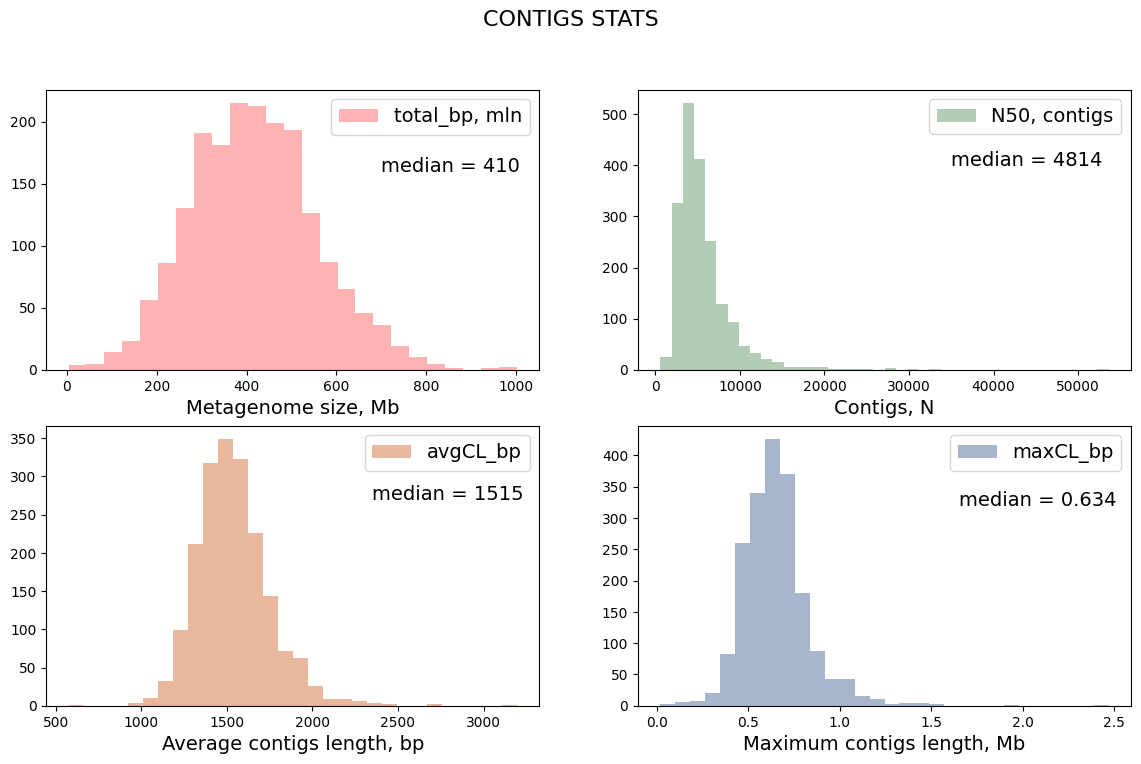

In [64]:
plt.rcParams["figure.figsize"] = [14,8]
plt.suptitle('CONTIGS STATS', fontsize=16) 

plt.subplot(2,2,1)
plt.hist(cs['total_bp']/1000000,bins=25, color = 'red', alpha=0.3)
plt.xlabel('Metagenome size, Mb', fontsize=14)
plt.legend(['total_bp, mln'],loc='upper right', prop={'size': 14})
m1 = str((cs['total_bp']/1000000).median())[0:3]
plt.text(700, 160, 'median = '+str(m1), fontsize=14)

plt.subplot(2,2,2)
plt.hist(cs['N50'],bins=40, color = '#80aa85', alpha=0.6)
plt.xlabel('Contigs, N', fontsize=14)
plt.legend(['N50, contigs'],loc='upper right', prop={'size': 14})
m1 = str(cs['N50'].median())[0:4]
plt.text(35000, 400, 'median = '+str(m1), fontsize=14)

plt.subplot(2,2,3)
plt.hist(cs['avgCL_bp'],bins=30, color = '#db875b', alpha=0.6)
plt.xlabel('Average contigs length, bp', fontsize=14)
plt.legend(['avgCL_bp'],loc='upper right', prop={'size': 14})
m2 = str(cs['avgCL_bp'].median())[0:4]
plt.text(2350, 270, 'median = '+str(m2), fontsize=14)

plt.subplot(2,2,4)
plt.hist(cs['maxCL_bp']/1000000,bins=30, color = '#6d86ad', alpha=0.6)
plt.xlabel('Maximum contigs length, Mb', fontsize=14)
plt.legend(['maxCL_bp'],loc='upper right', prop={'size': 14})
m3 = str((cs['maxCL_bp']/1000000).median())[0:5]
plt.text(1.65, 320, 'median = '+str(m3), fontsize=14)

plt.savefig('results/ContigsStats_BGI.jpg', dpi = 400, bbox_inches = 'tight')
plt.savefig('results/ContigsStats_BGI.svg', bbox_inches = 'tight')

## How does the number of reads correlate with assembly statistics?

In [32]:
rn = pd.read_csv('input/ReadsNumb_BGI.csv')
rn['nameS'] = rn['name'].str.split('_',expand=True)[1]
rn.head(2)

,name,reads_numb,nameS
0,lab20_V3276M_E100013465_L01,109810982,V3276M
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP


In [33]:
mrg = pd.merge(rn, cs, on='nameS')
mrg = mrg.loc[:, mrg.columns!='path']
mrg = mrg.loc[:, mrg.columns!='minCL_bp']
mrg.to_csv('results/Mrg_BGI1.csv', index=False)
mrg.head(2)

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs
0,lab20_V3276M_E100013465_L01,109810982,V3276M,407116049,673015,1611,6301,252608
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581


In [34]:
mrg.columns.tolist()
cols = ['nameS','reads_numb','name','total_bp','maxCL_bp','avgCL_bp','N50','contigs']
#mrg = mrg[cols]
mrg.head(2)

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs
0,lab20_V3276M_E100013465_L01,109810982,V3276M,407116049,673015,1611,6301,252608
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581


In [37]:
len(mrg)

1900

In [35]:
mrg.to_csv('results/ContigsRNumbStats_BGI_part1.csv', index=False)

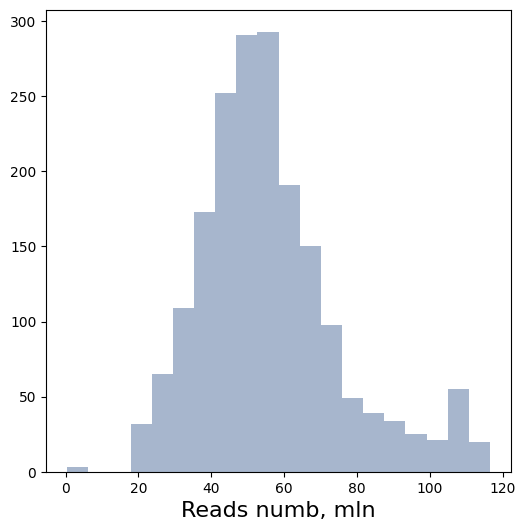

In [39]:
plt.rcParams["figure.figsize"] = [6,6]

plt.hist(mrg['reads_numb']/1000000,bins=20, color = '#6d86ad', alpha=0.6)
plt.xlabel('Reads numb, mln', fontsize=16)

plt.savefig('results/RN.jpg', dpi = 400, bbox_inches = 'tight')

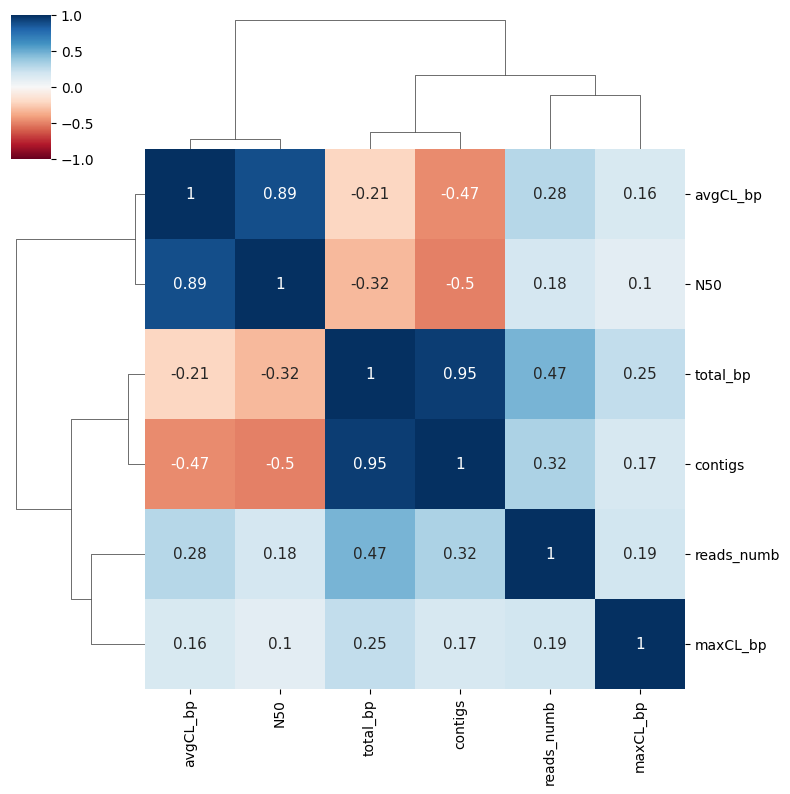

In [40]:
cor = mrg[['reads_numb','total_bp','maxCL_bp','avgCL_bp','N50','contigs']].corr( )

sns.clustermap(cor, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 11}, vmin=-1, vmax=1, figsize=(8,8));

plt.savefig('results/Corr_BGI1.jpg', dpi = 400, bbox_inches = 'tight')

Don't see strong correlation between reads number and contigs stats.
Total metagenome size slitely correlated with reads number, but average contig length doesn't grow.

It woould be interesting to check correlation between reads number and HQ bins number.

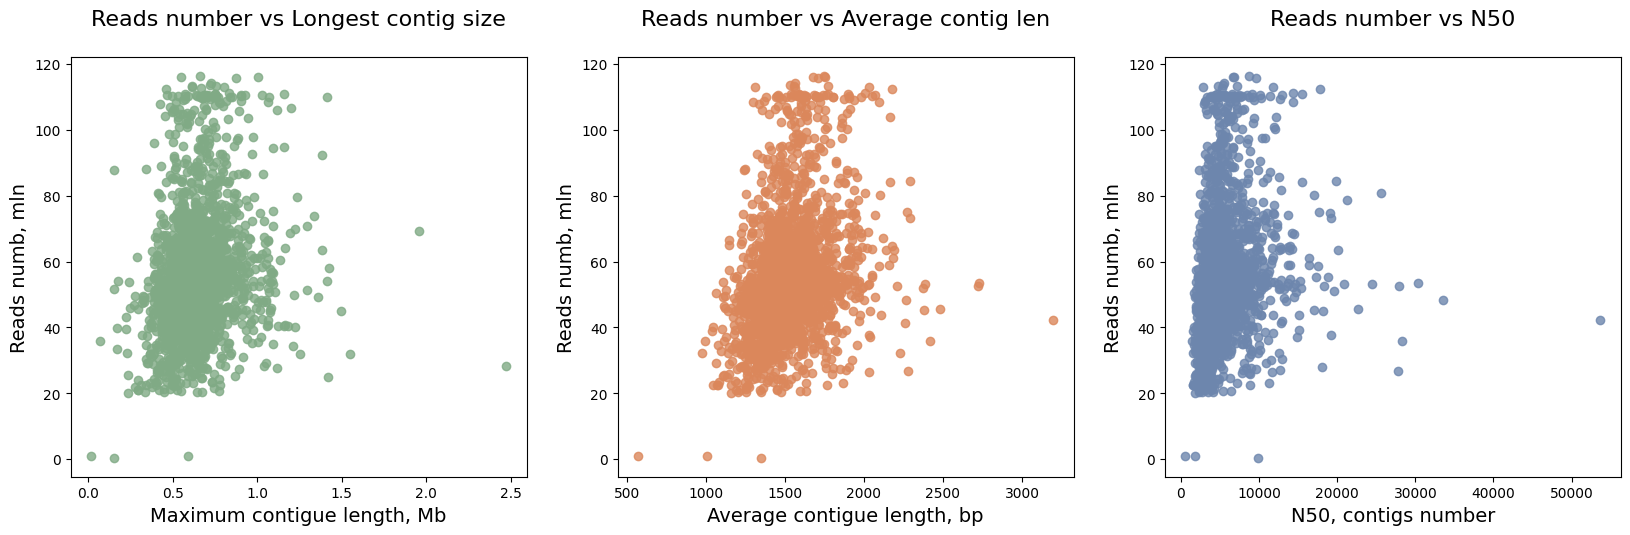

In [41]:
plt.rcParams["figure.figsize"] = [20,12]

plt.subplot(2,3,1)
plt.title('Reads number vs Longest contig size'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['maxCL_bp']/1000000, color = '#80aa85', alpha=0.8)

plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('Maximum contigue length, Mb', fontsize=14)

plt.subplot(2,3,2)
plt.title('Reads number vs Average contig len'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['avgCL_bp'], color = '#db875b', alpha=0.8)

plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('Average contigue length, bp', fontsize=14)

plt.subplot(2,3,3)
plt.title('Reads number vs N50'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['N50'], color = '#6d86ad', alpha=0.8)

plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('N50, contigs number', fontsize=14)

plt.savefig('results/RN_vs_ContStat.jpg', dpi = 400, bbox_inches = 'tight')